# RFCrypto

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

COIN = 'ETHBUSD'
TIME = '30m'

In [7]:
# !python data_loader.py --coin ETHBUSD --time 15m

## Klines

In [8]:
klines = pd.read_csv(f'./klines/{COIN}_{TIME}.csv')
klines = klines.iloc[:,1:]
klines['timestamp'] = pd.to_datetime(klines.timestamp)
klines

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time
0,2021-03-01 00:00:00,1421.35,1450.88,1412.30,1441.50,9975.10635,1614558599999,1.430813e+07,16898,5022.33978,2021-03-01
1,2021-03-01 00:30:00,1441.73,1452.56,1441.19,1443.22,6350.20225,1614560399999,9.185153e+06,12528,3154.76630,2021-03-01
2,2021-03-01 01:00:00,1443.39,1449.55,1428.57,1435.20,6571.05176,1614562199999,9.442462e+06,10972,3084.98996,2021-03-01
3,2021-03-01 01:30:00,1435.04,1445.44,1434.62,1442.00,6196.16782,1614563999999,8.922005e+06,9369,3188.12220,2021-03-01
4,2021-03-01 02:00:00,1442.00,1458.62,1439.03,1452.11,8289.00965,1614565799999,1.199415e+07,13042,3857.25552,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,3237.45,3237.57,3214.37,3222.17,1487.87310,1649455199999,4.795426e+06,5793,600.44240,2022-04-08
19359,2022-04-08 22:00:00,3222.65,3228.94,3192.33,3192.33,4534.63730,1649456999999,1.453230e+07,11366,2225.97630,2022-04-08
19360,2022-04-08 22:30:00,3192.31,3209.75,3186.55,3191.10,1826.88800,1649458799999,5.844115e+06,5710,900.15970,2022-04-08
19361,2022-04-08 23:00:00,3191.10,3198.91,3175.88,3178.50,2805.18970,1649460599999,8.936618e+06,9418,1325.04590,2022-04-08


## Labeled data

In [9]:
import json

with open(f'./labeled/{COIN}_{TIME}_labels.json', 'r') as fIn:
    labels = json.load(fIn)

labeled_data = labels[0]['annotations'][0]['result']
labeled_data

[{'value': {'start': '2021-03-02 20:30:00',
   'end': '2021-03-03 12:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'Ad814EZUSN',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-01 06:30:00',
   'end': '2021-03-02 00:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'YZ-6N5dP41',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-04 09:00:00',
   'end': '2021-03-04 16:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': '33XT-1l0rU',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-05 16:00:00',
   'end': '2021-03-09 03:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': '7z1CUrYjLG',
  'from_name': 'predictable',
  'to_name': 'stock',
  'ty

In [10]:
dict_labels = {}
count = 0
for value in labeled_data:
    if value['value']['end'] == '0NaN-NaN-NaN NaN:NaN:NaN':
        pass
    else:
        count +=1
        dict_labels[count] = [value['value']['start'], 1]
        count +=1
        dict_labels[count] = [value['value']['end'], 2]

labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=['timestamp', 'label'])
labels['timestamp'] = pd.to_datetime(labels.timestamp)

labels

,timestamp,label
1,2021-03-02 20:30:00,1
2,2021-03-03 12:30:00,2
3,2021-03-01 06:30:00,1
4,2021-03-02 00:00:00,2
5,2021-03-04 09:00:00,1
...,...,...
304,2022-01-23 23:30:00,2
305,2022-01-06 12:00:00,1
306,2022-01-06 19:00:00,2
307,2021-11-20 15:30:00,1


In [11]:
klines_label = klines.merge(labels, on='timestamp', how='outer')
klines_label = klines_label.fillna(0)

for i, row in klines_label.iterrows():
    if i > 1:
        last_row = klines_label.label.iloc[i-1]
        if last_row == 0 and row.label == 1:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 0:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 2:
            klines_label.loc[i, 'label'] = 2
        elif last_row == 2 and row.label == 0:
            klines_label.loc[i, 'label'] = 0
        else:
            klines_label.loc[i, 'label'] = 0
    else:
        pass

klines_label = klines_label.replace(2, 1)
klines_label['label'] = klines_label.label.shift(1)
klines_label = klines_label.fillna(0)
# klines['time'] = pd.to_datetime(klines['timestamp'].dt.strftime('%Y-%m-%d'))
klines_label

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time,label
0,2021-03-01 00:00:00,1421.35,1450.88,1412.30,1441.50,9975.10635,1614558599999,1.430813e+07,16898,5022.33978,2021-03-01,0.0
1,2021-03-01 00:30:00,1441.73,1452.56,1441.19,1443.22,6350.20225,1614560399999,9.185153e+06,12528,3154.76630,2021-03-01,0.0
2,2021-03-01 01:00:00,1443.39,1449.55,1428.57,1435.20,6571.05176,1614562199999,9.442462e+06,10972,3084.98996,2021-03-01,0.0
3,2021-03-01 01:30:00,1435.04,1445.44,1434.62,1442.00,6196.16782,1614563999999,8.922005e+06,9369,3188.12220,2021-03-01,0.0
4,2021-03-01 02:00:00,1442.00,1458.62,1439.03,1452.11,8289.00965,1614565799999,1.199415e+07,13042,3857.25552,2021-03-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,3237.45,3237.57,3214.37,3222.17,1487.87310,1649455199999,4.795426e+06,5793,600.44240,2022-04-08,0.0
19359,2022-04-08 22:00:00,3222.65,3228.94,3192.33,3192.33,4534.63730,1649456999999,1.453230e+07,11366,2225.97630,2022-04-08,0.0
19360,2022-04-08 22:30:00,3192.31,3209.75,3186.55,3191.10,1826.88800,1649458799999,5.844115e+06,5710,900.15970,2022-04-08,0.0
19361,2022-04-08 23:00:00,3191.10,3198.91,3175.88,3178.50,2805.18970,1649460599999,8.936618e+06,9418,1325.04590,2022-04-08,0.0


## Merge & Feature Eng.

In [12]:
import pandas_ta as pta
import numpy as np

# df = klines_label.merge(greed, left_on='time', right_on='time')
df = klines_label.copy()
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades', 'label']]

df['candle_hight'] = 100 * (df.high - df.low) / ((df.high + df.low) / 2)
df['price_change'] = df['close'].pct_change() * 100
df['FASTMA'] = df.close.ewm(2).mean() # 30 $26 %32
df['SLOWMA'] = df.close.ewm(80).mean() # 100 $26 %32
df['FASTSlope'] = np.degrees(np.arctan(df['FASTMA'].diff()/2))
df['SLOWSlope'] = np.degrees(np.arctan(df['SLOWMA'].diff()/80))
df['RSI'] = pta.rsi(df.close)
df['Slope'] = pta.slope(df.close, length=7)
df['AROON'] = pta.aroon(df['high'], df['low'])['AROONU_14']
df['BBAND'] = pta.bbands(df['close'], length=14, std=2, talib=False)['BBP_14_2.0']
df['OBV'] = pta.bbands(close=df['close'], volume=df['volume'])['BBP_5_2.0']
df['MACD'] = pta.macd(close=df['close'])['MACD_12_26_9']

df = df.dropna()
df = df.sort_values('timestamp')
df

,timestamp,open,high,low,close,volume,numberoftrades,label,candle_hight,price_change,FASTMA,SLOWMA,FASTSlope,SLOWSlope,RSI,Slope,AROON,BBAND,OBV,MACD
25,2021-03-01 12:30:00,1512.10,1536.60,1511.99,1530.78,6567.82667,11484,1.0,1.614517,1.234699,1519.486180,1467.583448,70.497791,2.118275,74.663192,3.822857,92.857143,0.795544,0.801881,35.203828
26,2021-03-01 13:00:00,1530.98,1541.07,1530.98,1533.39,8302.86062,13902,1.0,0.656890,0.170501,1524.120868,1470.434530,66.658427,2.041073,75.247875,3.914286,100.000000,0.772473,0.778248,35.260986
27,2021-03-01 13:30:00,1533.32,1535.00,1524.82,1525.37,5827.37949,9980,1.0,0.665399,-0.523024,1524.537250,1472.743102,11.760478,1.652934,69.909334,2.304286,92.857143,0.692751,0.488256,34.264162
28,2021-03-01 14:00:00,1525.36,1534.04,1516.25,1532.44,7769.10681,12895,1.0,1.166446,0.463494,1527.171521,1475.179460,52.793379,1.744374,71.808145,1.160000,85.714286,0.724921,0.678811,33.656688
29,2021-03-01 14:30:00,1532.58,1543.00,1525.58,1527.86,7381.77340,12592,1.0,1.135379,-0.298870,1527.401015,1477.269956,6.545897,1.496867,68.780226,0.864286,100.000000,0.669189,0.322480,32.431838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,3237.45,3237.57,3214.37,3222.17,1487.87310,5793,0.0,0.719164,-0.471976,3236.717108,3288.488964,-74.625413,-0.593697,41.258749,-2.075714,7.142857,0.109637,0.090486,-6.783982
19359,2022-04-08 22:00:00,3222.65,3228.94,3192.33,3192.33,4534.63730,11366,0.0,1.140273,-0.926084,3221.921405,3287.301816,-82.301740,-0.850170,35.267867,-9.588571,0.000000,-0.083658,0.055100,-10.559449
19360,2022-04-08 22:30:00,3192.31,3209.75,3186.55,3191.10,1826.88800,5710,0.0,0.725419,-0.038530,3211.647603,3286.114139,-78.984012,-0.850548,35.041999,-9.991429,0.000000,0.011841,0.210361,-13.495220
19361,2022-04-08 23:00:00,3191.10,3198.91,3175.88,3178.50,2805.18970,9418,0.0,0.722534,-0.394848,3200.598402,3284.785570,-79.740063,-0.951430,32.729583,-8.705714,0.000000,-0.010971,0.205572,-16.646662


## Model

In [13]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades',
       'label', 'candle_hight', 'price_change', 'FASTMA', 'SLOWMA',
       'FASTSlope', 'SLOWSlope', 'RSI', 'Slope', 'AROON', 'BBAND', 'OBV',
       'MACD'],
      dtype='object')

In [14]:
ml = df.copy()

to_remove = ['timestamp', 'numberoftrades', 'FASTMA', 'SLOWMA', 'SLOWSlope', 'FASTSlope', 'open', 'high', 'low', 'close','label']

columns = df.columns
columns = [i for i in columns if i not in to_remove]
columns.append('label')

ml = ml[columns] # label at the end
ml = ml.astype('float32')
ml.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,19338.0,4490.427734,4093.776367,109.856483,1975.144257,3302.987305,5631.626221,65719.000000
candle_hight,19338.0,1.013621,0.872693,0.126805,0.559519,0.803376,1.198342,45.478561
price_change,19338.0,0.006639,0.744024,-10.533595,-0.327458,0.013863,0.349497,6.186742
RSI,19338.0,51.099430,12.042683,9.295355,42.968391,51.341343,59.009371,87.416809
Slope,19338.0,0.087618,8.082609,-85.715714,-3.558214,0.277143,3.913571,69.428574
AROON,19338.0,48.265812,36.189411,0.000000,14.285714,50.000000,85.714287,100.000000
BBAND,19338.0,0.512849,0.321929,-0.355125,0.261477,0.530044,0.764426,1.373518
OBV,19338.0,0.508113,0.285022,0.000296,0.252634,0.520333,0.759202,0.999049
MACD,19338.0,0.657946,23.932945,-191.294342,-10.993712,2.061324,13.943758,97.664062
label,19338.0,0.414314,0.492616,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

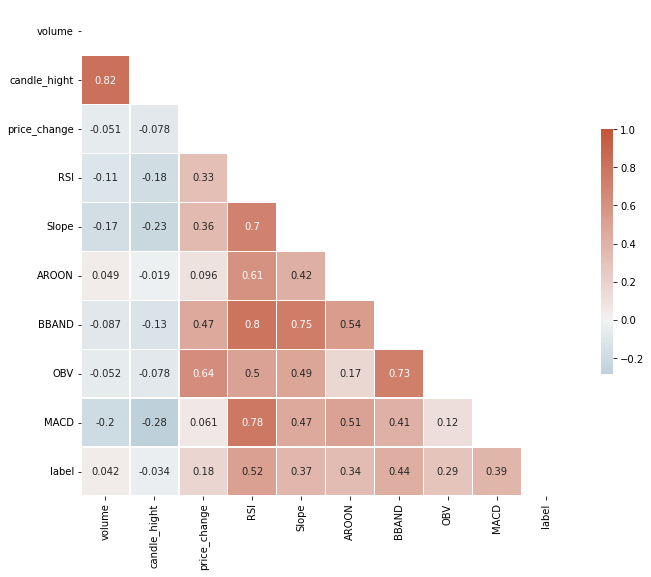

In [15]:
import seaborn as sns

corr = ml.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
# pd.plotting.scatter_matrix(ml, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [17]:
# Function from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
total_columns = len(ml.columns)

reframed = series_to_supervised(ml, 28, 1)
variable_name = f'var10'

# remove the label column from each time step
columns = []
for columnName, columnData in reframed.iteritems():
    if variable_name in columnName:
        if columnName == variable_name+'(t)':
            pass
        else:
            columns.append(columnName)

reframed = reframed.drop(columns, axis=1)

# remove the last time step but not the label
columns_to_remove = reframed.iloc[:, -total_columns:-1].columns
reframed = reframed.drop(columns_to_remove, axis=1)
reframed

,var1(t-28),var2(t-28),var3(t-28),var4(t-28),var5(t-28),var6(t-28),var7(t-28),var8(t-28),var9(t-28),var1(t-27),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t)
53,6567.826660,1.614517,1.234699,74.663193,3.822857,92.857140,0.795544,0.801881,35.203827,8302.860352,...,11247.906250,1.875563,-0.036323,59.355663,2.420000,71.428574,0.686445,0.463391,18.105545,0.0
54,8302.860352,0.656890,0.170501,75.247871,3.914286,100.000000,0.772473,0.778248,35.260986,5827.379395,...,7237.091797,1.140935,0.039523,59.518932,1.284286,64.285713,0.664244,0.653965,17.699511,0.0
55,5827.379395,0.665399,-0.523024,69.909332,2.304286,92.857140,0.692751,0.488256,34.264160,7769.106934,...,6747.481445,1.604726,-1.117682,53.028946,-2.794286,57.142857,0.441474,0.241351,15.780486,0.0
56,7769.106934,1.166446,0.463494,71.808144,1.160000,85.714287,0.724921,0.678811,33.656689,7381.773438,...,5552.760254,0.780507,0.322211,54.550350,-6.808571,50.000000,0.465514,0.285053,14.496003,0.0
57,7381.773438,1.135379,-0.298870,68.780228,0.864286,100.000000,0.669189,0.322480,32.431839,7975.770508,...,6223.959961,1.046188,-0.007708,54.504719,-1.344286,42.857143,0.415763,0.358874,13.314873,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,4383.622559,1.332511,1.117535,63.298309,4.107143,100.000000,1.042062,0.900271,11.817545,4967.621582,...,862.226685,0.622930,-0.411894,44.884045,-1.221429,14.285714,0.245453,0.305377,-4.904692,0.0
19359,4967.621582,0.546475,0.216046,65.068878,4.940000,100.000000,1.090141,0.837361,13.488503,3659.298584,...,1487.873047,0.719164,-0.471976,41.258747,-2.075714,7.142857,0.109637,0.090486,-6.783982,0.0
19360,3659.298584,0.839873,-0.013056,64.864784,3.780000,100.000000,0.975280,0.721950,14.609642,2276.058594,...,4534.637207,1.140273,-0.926084,35.267868,-9.588572,0.000000,-0.083658,0.055100,-10.559449,0.0
19361,2276.058594,0.475130,0.211661,66.688667,4.221428,92.857140,0.982269,0.716600,15.877546,2454.584229,...,1826.887939,0.725419,-0.038530,35.042000,-9.991428,0.000000,0.011841,0.210361,-13.495219,0.0


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X = reframed.drop([variable_name+'(t)'], axis=1)
y = reframed[variable_name+'(t)']

X1 = df.drop(['label'], axis=1)
y1 = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
_, X_backtest, _, y_backtest = train_test_split(X1, y1, test_size=0.3, random_state=42, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(13517, 252)
(13517,)
0.0    7503
1.0    6014
Name: var10(t), dtype: int64


### Random Forest

In [20]:
import pickle
model = pickle.load(open(f'./models/{COIN}.sav', 'rb'))

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Predict and confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3198,  622],
       [ 930, 1043]], dtype=int64)

#### Precision, Recall and F1 Score

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision Score, Recall Score and F1 Score
precision_score_p = precision_score(y_test, y_pred)
print('Precision Score: ', precision_score_p)

recall_score_p = recall_score(y_test, y_pred)
print('Recall Score: ', recall_score_p)

f1_score_p = f1_score(y_test, y_pred)
print('F1 Score: ', f1_score_p)

Precision Score:  0.6264264264264264
Recall Score:  0.52863659401926
F1 Score:  0.5733919736118747


#### Precision Recall Curve

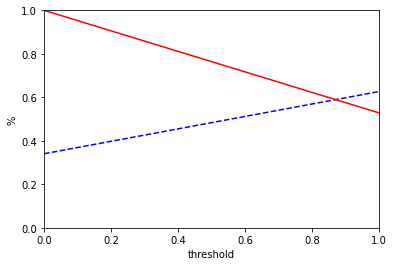

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('threshold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('%')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#### Roc Curve

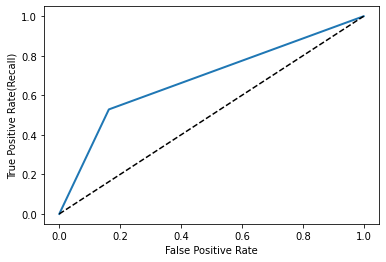

ROC Score:  0.6829046844441851


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot the Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')

plot_roc_curve(fpr, tpr)
plt.show()

print('ROC Score: ', roc_auc_score(y_test, y_pred))

## BackTest & Visualise

In [99]:
t_start = 4000
t_end = 57000
threshold = .5
start = start = len(X_backtest) - len(X_test) - 1

yhat = model.predict_proba(X_test)
yhat = [i[1] for i in yhat]

price = X_backtest.iloc[start:,4].to_list()
slowma = X_backtest.iloc[start:,9].to_list()
slowma100 = X_backtest.iloc[start:,10].to_list()
slope = X_backtest.iloc[start:,11].to_list()
slope100 = X_backtest.iloc[start:,12].to_list()

new_order = False
amount = 100
leverage = 1
quantity=0
total=0
bought_price=0
total_earned = []
bought_at = []
amount_plot = []
win_percentage = []
prediction_data = []
price_data = []

for i in range(t_start, t_end):
    try:
        prediction = yhat[i]
        coin_price = price[i]
        price_data.append(coin_price)
        amount_plot.append(amount)
        prediction_data.append(prediction)

        if (new_order is False) and ((prediction > threshold) and (slope100[i] > 0)):
            quantity = round(amount / coin_price, 5)
            bought_price = coin_price
            total_earned.append(0)
            bought_at.append(1)
            new_order = True

        elif (new_order is True) and (((prediction < threshold) and (slope100[i] < 0)) or (coin_price < bought_price * .98)):
            total_earn = (quantity * coin_price - amount) * leverage
            win_percentage.append(1 - bought_price / coin_price)
            # amount = amount + total_earn
            total += total_earn
            total_earned.append(total_earn)
            bought_at.append(0)

            new_order = False

        else:
            bought_at.append(0)
            total_earned.append(0)
            pass

    except:
        pass

total

18.539575199999987

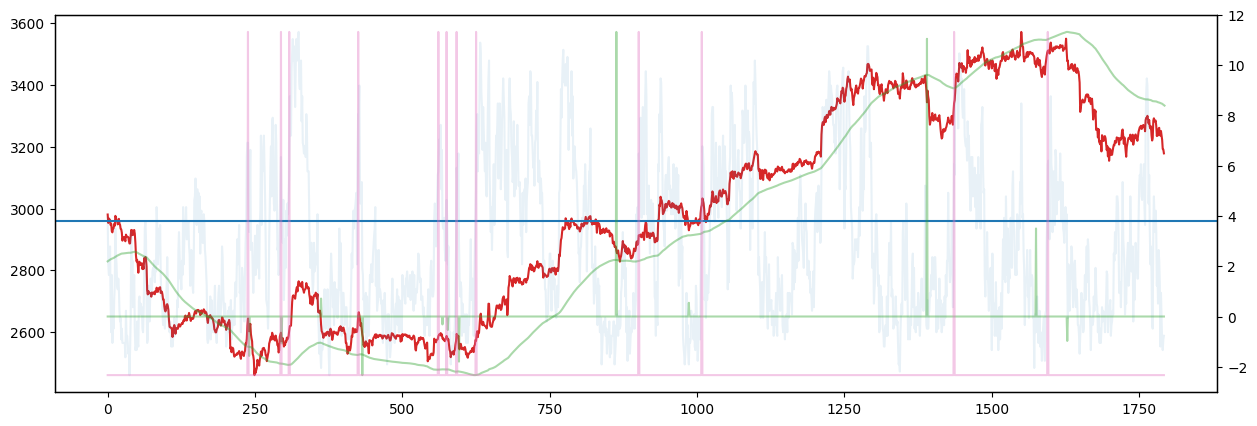

In [100]:
fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(price_data, color=color)
# ax1.axes.yaxis.set_visible(False)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(prediction_data, color=color, alpha=0.1)
ax2.axhline(y=.45, color=color, linestyle='-')
ax2.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(total_earned, color=color, alpha=0.4)
# ax3.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(slowma100[t_start:t_end], color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)
#
ax3 = ax1.twinx()
color = 'tab:pink'
ax3.plot(bought_at, color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)

In [47]:
positive = 0
negative = 0

total_earn = 0
total_loss = 0

for i in total_earned:
    if i == 0:
        pass
    elif i > 0:

        positive = positive + 1
        total_earn = total_earn + i
    else:
        negative = negative + 1
        total_loss = total_loss + i

perc = positive/(positive+negative)

print('Total Trades: ', positive+negative)
print('Total Positive: ', positive, total_earn)
print('Total Negative: ', negative, total_loss)
print('Winning Rate: ', perc)
print('Average Profit: ', np.mean(win_percentage))

Total Trades:  74
Total Positive:  22 20.912290800000022
Total Negative:  52 -28.607697499999986
Winning Rate:  0.2972972972972973
Average Profit:  -0.0011840917119282548


In [23]:
pd.Series(win_percentage).sort_values(ascending=False) * 100

9    12.865756
7     9.384866
1     0.175298
5    -0.212229
4    -0.312502
3    -0.682164
0    -1.162451
8    -1.174723
2    -1.299217
6    -1.838673
dtype: float64

#### Feature Importance

[]

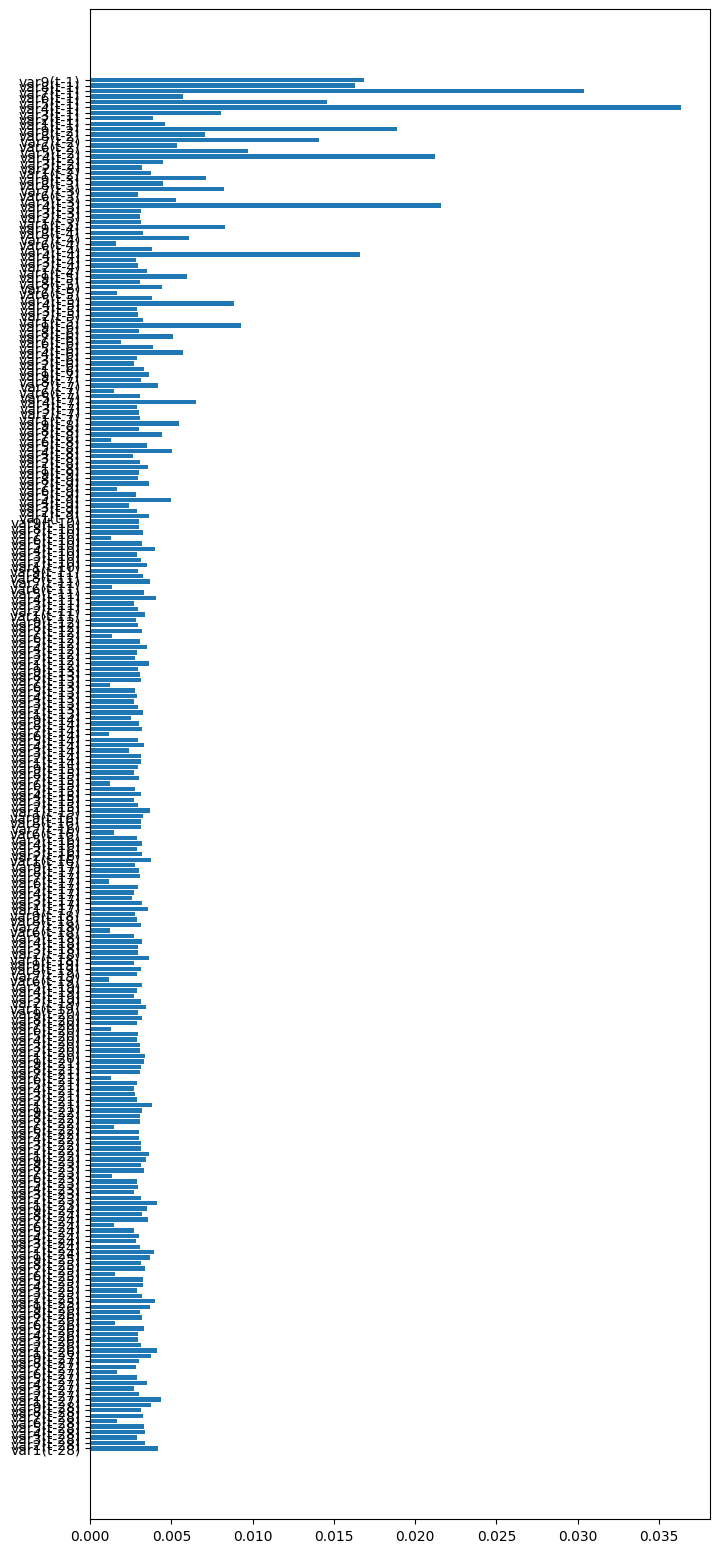

In [59]:
from matplotlib.pyplot import figure
columns = list(X_train.columns)
features_importance = model.feature_importances_
figure(figsize=(8, 20), dpi=100)
plt.barh(columns, features_importance)
plt.plot()

## Save Model!

In [22]:
import pickle
filename = f'./models/{COIN}.sav'
pickle.dump(model, open(filename, 'wb'))

## Test with Real data

In [1]:
from sqlalchemy import create_engine
import json

def db_connection():
    f = open("keys.json")
    data = json.load(f)
    engine = create_engine(data['connection'])

    return engine

with open('keys.json', 'r') as fIn:
    keys = json.load(fIn)

In [18]:
import pandas as pd
# AND timestamp BETWEEN '2022-03-30 09:00:00' AND '2022-03-30 23:00:00'
data = pd.read_sql_query("SELECT timestamp, price, prediction FROM data WHERE COIN = 'ETHBUSD' AND timestamp BETWEEN '2022-04-06 00:00:00' AND '2022-04-06 09:00:00'", db_connection(), index_col='timestamp')
data

,price,prediction
timestamp,,
2022-04-06 00:00:31,3446.33,0.223333
2022-04-06 00:01:03,3446.14,0.230000
2022-04-06 00:01:36,3443.64,0.223333
2022-04-06 00:02:08,3440.78,0.223333
2022-04-06 00:02:40,3439.81,0.220000
...,...,...
2022-04-06 08:57:51,3350.70,0.230000
2022-04-06 08:58:23,3348.48,0.233333
2022-04-06 08:58:55,3345.95,0.226667


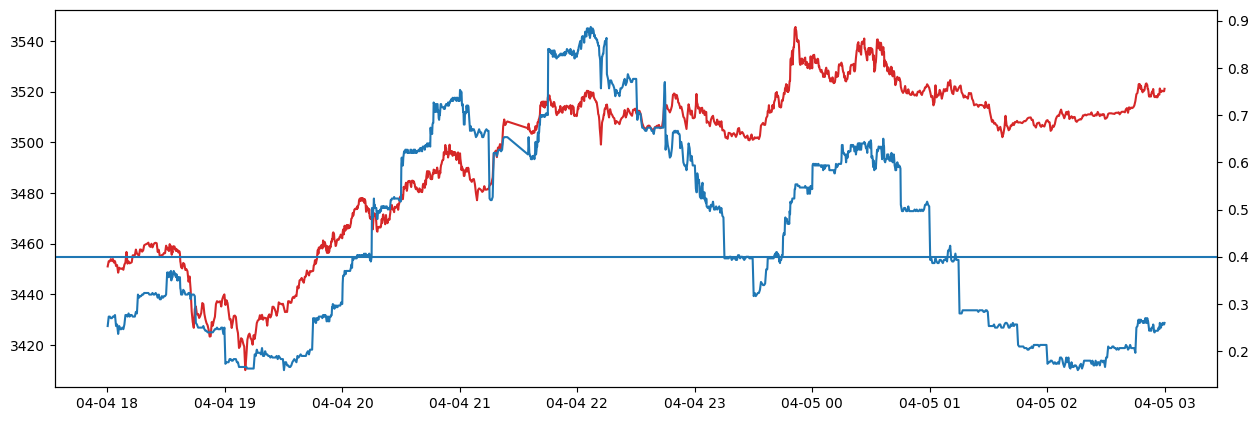

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.4, color=color, linestyle='-')

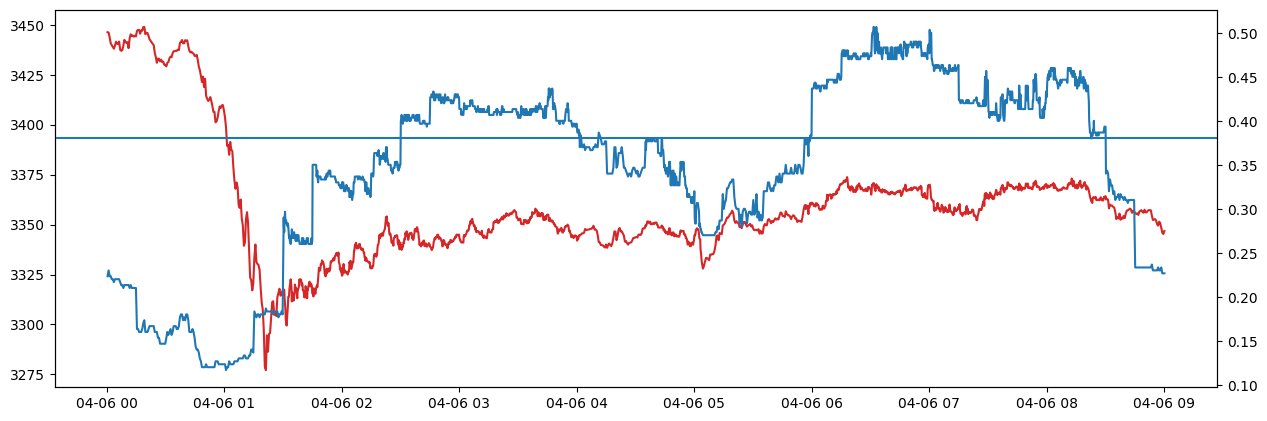

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.38, color=color, linestyle='-')